In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Question 1
weekly=load_data('Weekly')
weekly



,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


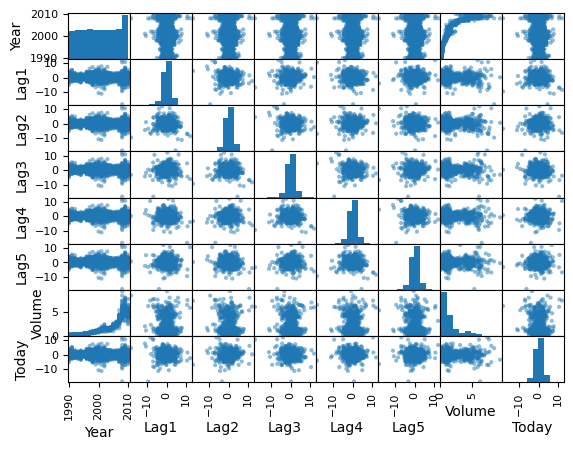

In [ ]:
#1
weekly.describe()

pd.plotting.scatter_matrix(weekly)
plt.show()


In [ ]:
#logistic regression
allvars = weekly.columns.drop(['Today', 'Direction', 'Year'])
print(allvars)
design = MS(allvars)
X = design.fit_transform(weekly)
y = weekly.Direction == 'Up' # if 'Up' y = 1, if not y=0
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object')


,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


In [ ]:
#confusion matrix

labels = np.array(['Down']*1089)
labels[probs>0.5] = "Up" # if probs>0.5, assign up

confusion_table(labels, weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [ ]:
# Split the data into training and test sets
train_data = weekly[(weekly['Year'] >= 1990) & (weekly['Year'] <= 2008)]
test_data = weekly[(weekly['Year'] >= 2009) & (weekly['Year'] <= 2010)]

# Define the predictor and response variable for training
X_train = train_data[['Lag2']]
y_train = train_data['Direction'].map({'Up': 1, 'Down': 0})

# Add a constant for the intercept
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
model_train = sm.Logit(y_train, X_train)
result_train = model_train.fit()

# Predict on the test set
X_test = test_data[['Lag2']]
y_test = test_data['Direction'].map({'Up': 1, 'Down': 0})
X_test = sm.add_constant(X_test)

# Get predicted probabilities and classify as 0 or 1
predicted_probabilities_test = result_train.predict(X_test)
predicted_classes_test = (predicted_probabilities_test >= 0.5).astype(int)

# Compute confusion matrix and accuracy for test set
cm_test = confusion_matrix(y_test, predicted_classes_test)
accuracy_test = accuracy_score(y_test, predicted_classes_test)

# Display results
print("Confusion Matrix for Test Model:")
print(cm_test)
print(f"Overall Fraction of Correct Predictions: {accuracy_test:.2f}")






Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
Confusion Matrix for Test Model:
[[ 9 34]
 [ 5 56]]
Overall Fraction of Correct Predictions: 0.62


In [ ]:
#Q2
#1.

Auto = load_data('Auto')
Auto




,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [ ]:
median_mpg = Auto['mpg'].median()

# Create the binary variable 'mpg01'
Auto['mpg01'] = (Auto['mpg'] > median_mpg).astype(int)

# Display the updated DataFrame
print(Auto)

                            mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   
...                         ...        ...           ...         ...     ...   
ford mustang gl            27.0          4         140.0          86    2790   
vw pickup                  44.0          4          97.0          52    2130   
dodge rampage              32.0          4         135.0          84    2295   
ford ranger                28.0          4         120.0          79    2625   
chevy s-10                 31.0         

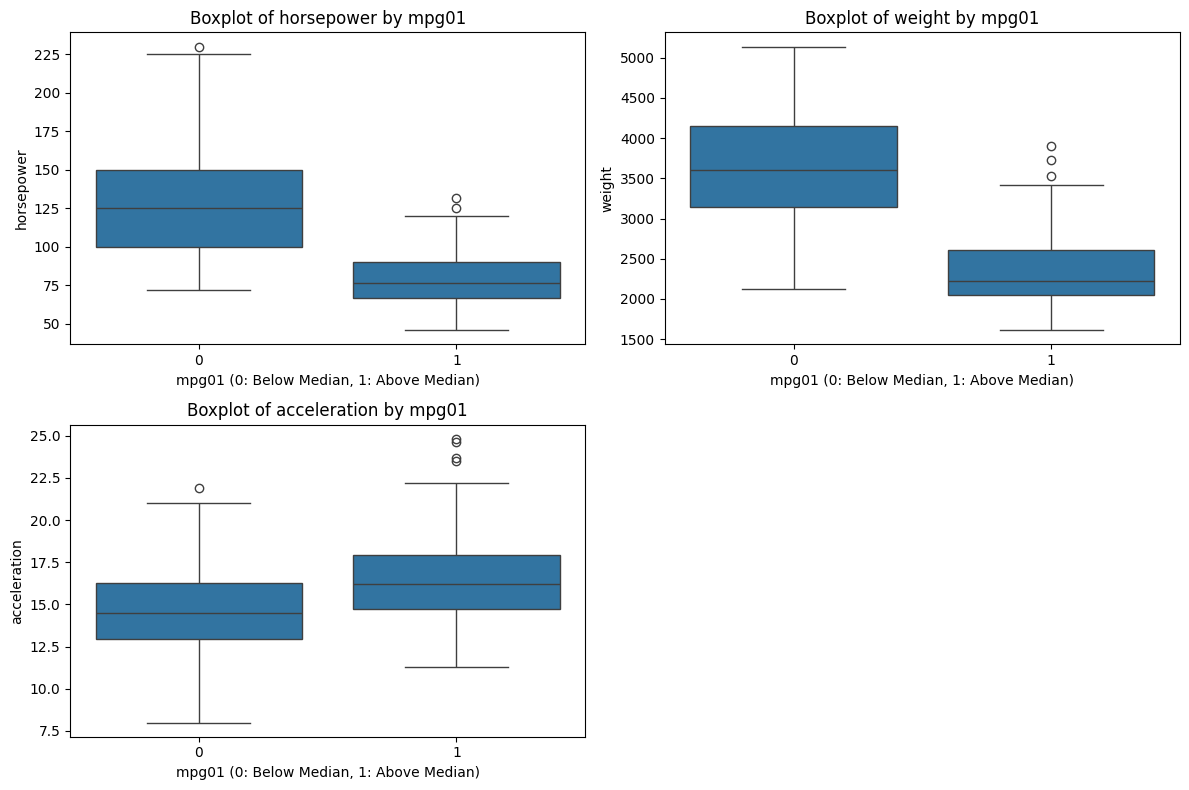

In [ ]:
#boxplots [auto]
# Create boxplots for continuous features
features = ['horsepower', 'weight', 'acceleration']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='mpg01', y=feature, data=Auto)
    plt.title(f'Boxplot of {feature} by mpg01')
    plt.xlabel('mpg01 (0: Below Median, 1: Above Median)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


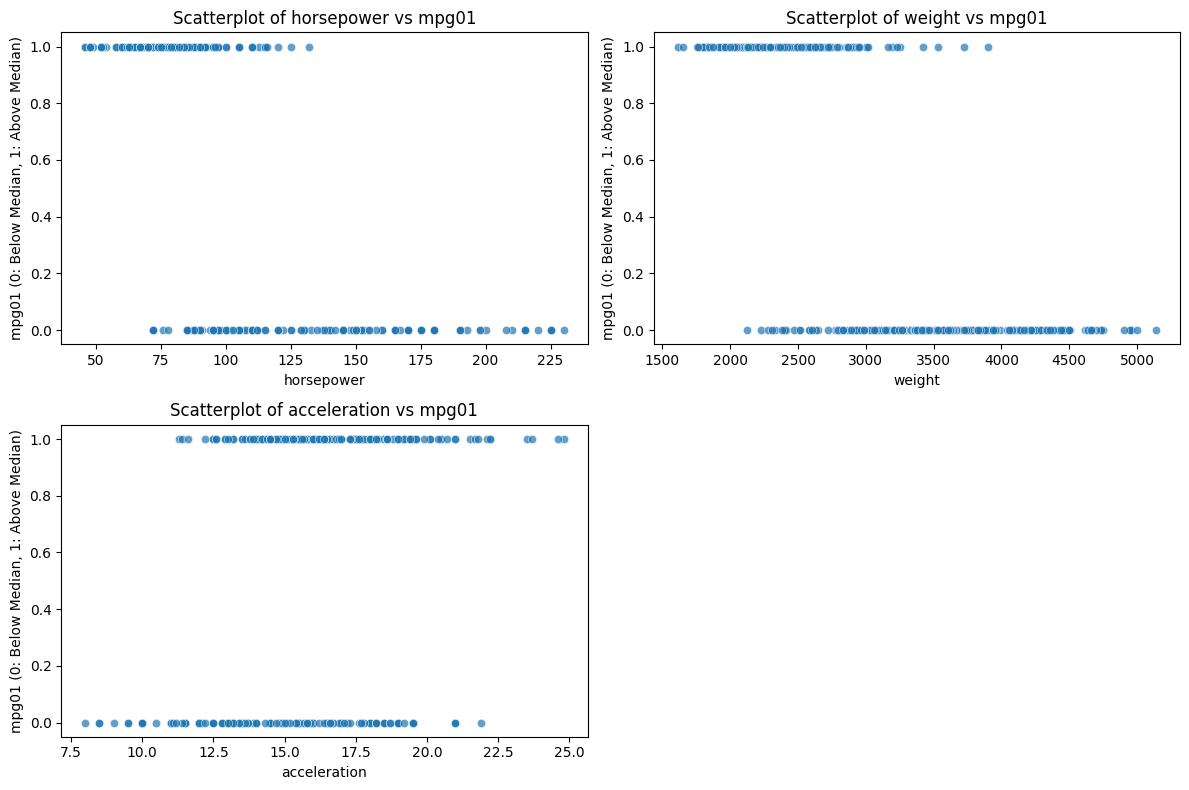

In [ ]:
#scatterplots[auto]
# Create scatterplots for continuous features
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=feature, y='mpg01', data=Auto, alpha=0.7)
    plt.title(f'Scatterplot of {feature} vs mpg01')
    plt.xlabel(feature)
    plt.ylabel('mpg01 (0: Below Median, 1: Above Median)')

plt.tight_layout()
plt.show()


In [ ]:
features = ['weight', 'horsepower']  # Use the features that seemed most associated with mpg01
X = Auto[features]
y = Auto['mpg01']

# Add a constant for the intercept
X = sm.add_constant(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary of the logistic regression model
print(result.summary())

# Step 4: Make predictions and compute the test error
predicted_probabilities = result.predict(X_test)
predicted_classes = (predicted_probabilities >= 0.5).astype(int)

# Compute accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Test Error: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

Optimization terminated successfully.
         Current function value: 0.268829
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  mpg01   No. Observations:                  313
Model:                          Logit   Df Residuals:                      310
Method:                           MLE   Df Model:                            2
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.6121
Time:                        19:27:14   Log-Likelihood:                -84.143
converged:                       True   LL-Null:                       -216.92
Covariance Type:            nonrobust   LLR p-value:                 2.178e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9104      1.737      8.006      0.000      10.505      17.316
weight        -0.0032      0.

In [ ]:
#Question 3
#1

Boston = load_data('Boston')


median_crime = Boston['crim'].median()
Boston['crime_above_median'] = (Boston['crim'] > median_crime).astype(int)

print(Boston.head())


X = Boston.drop(columns=['crim', 'crime_above_median'])
y = Boston['crime_above_median']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train_const)
result = model.fit()


print(result.summary())

X_test_const = sm.add_constant(X_test)
predicted_probabilities = result.predict(X_test_const)
predicted_classes = (predicted_probabilities >= 0.5).astype(int)

cm = confusion_matrix(y_test, predicted_classes)

# Step 10: Display results
print("Confusion Matrix:")
print(cm)

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  crime_above_median  
0   4.98  24.0                   0  
1   9.14  21.6                   0  
2   4.03  34.7                   0  
3   2.94  33.4                   0  
4   5.33  36.2                   0  
Optimization terminated successfully.
         Current function value: 0.222359
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:     crime_above_median   No. Observations:                  404
Model:                          Logi